<a href="https://colab.research.google.com/github/devrihartle/DS-Unit-2-Applied-Modeling/blob/master/231_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [ ]:
from google.colab import files
uploaded = files.upload()


In [46]:
import pandas as pd
df = pd.read_csv('song_data.csv')

In [47]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [48]:
df['song_popularity'].nunique()

101

In [49]:
#drop any row in song popularity that is a 0 since that is equivalent to a null value
index_delete = df.index[df['song_popularity']==0]
df = df.drop(index_delete)

In [50]:
df.shape

(18563, 15)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18563 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18563 non-null  object 
 1   song_popularity   18563 non-null  int64  
 2   song_duration_ms  18563 non-null  int64  
 3   acousticness      18563 non-null  float64
 4   danceability      18563 non-null  float64
 5   energy            18563 non-null  float64
 6   instrumentalness  18563 non-null  float64
 7   key               18563 non-null  int64  
 8   liveness          18563 non-null  float64
 9   loudness          18563 non-null  float64
 10  audio_mode        18563 non-null  int64  
 11  speechiness       18563 non-null  float64
 12  tempo             18563 non-null  float64
 13  time_signature    18563 non-null  int64  
 14  audio_valence     18563 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.3+ MB


In [52]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


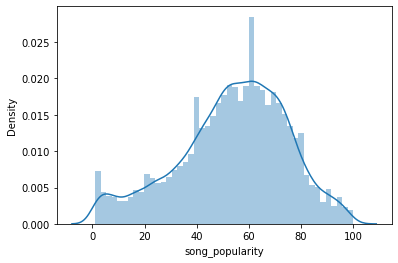

In [53]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.distplot(df['song_popularity']);

In [54]:
#create a new column with a binary classification for song popularity
df['popular'] = [1 if i>=51 else 0 for i in df.song_popularity ]
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popular
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,1
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,1
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,1
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,1
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,1


In [55]:
df['tempo'].describe()

count    18563.000000
mean       121.004157
std         28.719733
min          0.000000
25%         98.235500
50%        120.011000
75%        139.905500
max        242.318000
Name: tempo, dtype: float64

there shouldn't be any songs with a tempo of 0, so we will treat that as a null value

In [56]:
#I will replace the 0's in the tempo column with nan
import numpy as np
df['tempo'].replace(0, np.nan, inplace=True)
df['tempo'].describe()

count    18562.000000
mean       121.010676
std         28.706769
min         46.591000
25%         98.238500
50%        120.011000
75%        139.905750
max        242.318000
Name: tempo, dtype: float64

In [57]:
df['popular'].value_counts(normalize=True)

1    0.606691
0    0.393309
Name: popular, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
test.shape

(3713, 16)

I will use accuracy since my majority class is <50 and >70

In [71]:
target = 'popular'
features = df.columns.drop([target, 'song_popularity'])

X_train = train[features]
y_train = train[target]
X_val = validate[features]
y_val = validate[target]
X_test = test[features]
y_test = test[target]

